# Imports

In [5]:
import sys
sys.path.append("../src")

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Constant

In [2]:
train_path = "../data/selected_train.csv"
train_not_norm_path = "../data/train_not_normalized.csv"

# Loading data
If we want the dataset preprocessed by Fabio

In [72]:
take_normalized_data = False

In [73]:
def preprocessing_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [74]:
y_selected = selected_data["label"].values

if take_normalized_data:
    # Already preprocessed data
    selected_data = pd.read_csv(train_path, sep=",")
    X_selected = selected_data[selected_data.columns.difference(['label'])].values
    
else:
    # Load data not preprocessed and preprocess it
    selected_data = pd.read_csv(train_not_norm_path, sep=",")
    X_selected = selected_data[selected_data.columns.difference(['label'])].values
    X_selected = preprocessing_data(X_selected)

In [75]:
selected_data.head()

,label,KLK3,ITIH2,SULT1C3,SCGB2A1,KLK2,LRP2,KLK3.1,CELSR1,SLC26A3,...,KIAA1549L,RAB3B,CLEC7A,ADCY2,SPHKAP,CNMD,SERHL2,HPGD,GLYATL1,FGFR4
0,0,1,92,0,172,6,139,1,641,0,...,15,66,36,6,103,13,46,169,3,16
1,1,53,7,0,84,239,47,53,439,315,...,7,461,112,1058,179,95,273,69,44,177
2,2,10,41,0,54,41,70,10,230,8,...,62,45,118,32,320,24,53,146,4,8
3,0,0,60,0,144,0,345,0,1423,1,...,17,17,31,12,47,7,54,4,0,23
4,1,576,4,6,188,511,50,576,165,1121,...,12,107,110,258,222,69,2428,165,35,474


In [76]:
print("X_selected shape:", X_selected.shape)
print("y_selected shape:", y_selected.shape)

X_selected shape: (29, 56)
y_selected shape: (29,)


# Apply PCA

In [77]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_selected)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])

In [78]:
finalDf = pd.concat([principalDf, selected_data[['label']]], axis = 1)

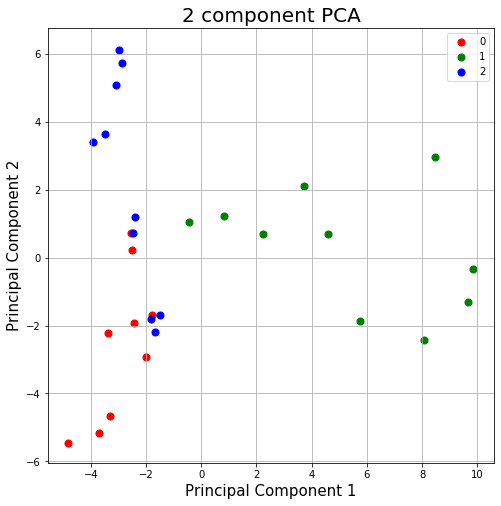

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep,   'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

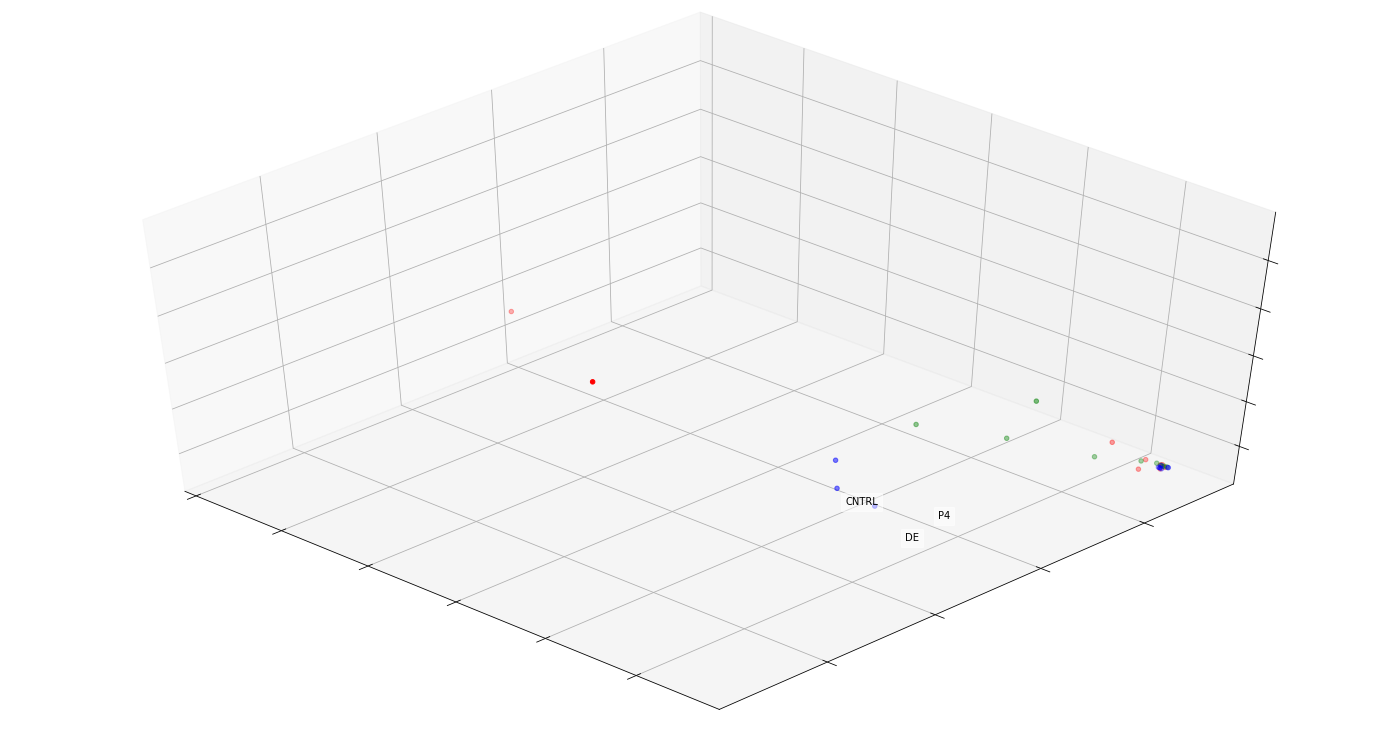

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
colors = ['r', 'g', 'b']

for name, label in [('CNTRL', 0), ('P4', 1), ('DE', 2)]:
    ax.text3D(X_selected [y_selected == label, 0].mean(),
              X_selected [y_selected == label, 1].mean() + 1.5,
              X_selected [y_selected == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y_selected, [1, 2, 0]).astype(np.float)
ax.scatter(X_selected[:, 0], X_selected[:, 1], X_selected[:, 2], c=[colors[c] for c in y_selected])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [83]:
print(pca.explained_variance_ratio_) 

[0.34543469 0.16066048]
